# Tarefa - Álgebra Linear

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

In [41]:
# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})
df.head(3)

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429


## 1. Reduzindo correlações
a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

In [42]:
# Matriz de transformação Média e Diferença:
m = np.array([[.5,.5],   # Linha da Matriz para cálculo Média
              [-1, 1]])  # Linha da Matriz para cálculo Diferença

df['média'], df['diferença'] = np.matmul(m, df[['p1', 'p2']].to_numpy().transpose())

In [53]:
# Aplicando Config para o estilo do DataFrame(.style)
df1 = df.style.format(precision=1, decimal=',') # Utilizar 1 casa decimal, formato BR(",")
df1.bar(subset='diferença', color=['red', 'green'], align='zero')

,p1,p2,média,diferença
0,"7,0","7,9","7,5","1,0"
1,"2,9","5,1","4,0","2,2"
2,"2,3","1,0","1,6","-1,3"
3,"5,5","4,5","5,0","-1,0"
4,"7,2","8,9","8,1","1,7"
5,"4,2","3,4","3,8","-0,8"
6,"9,8","9,8","9,8","0,0"
7,"6,8","7,9","7,4","1,1"
8,"4,8","5,7","5,3","0,9"
9,"3,9","5,7","4,8","1,8"


b) Calcule a correlação entre os dados da **p1** e **p2**

In [58]:
df.corr()

,p1,p2,média,diferença
p1,1.000000,0.895737,0.971960,-0.103312
p2,0.895737,1.000000,0.975163,0.349666
média,0.971960,0.975163,1.000000,0.133474
diferença,-0.103312,0.349666,0.133474,1.000000


In [59]:
df.p1.corr(df.p2)

0.8957365818728042

c) Calcule a correlação entre os dados transformados (média e diferença)

In [60]:
df['média'].corr(df['diferença'])

0.1334738541178884

d) Comente as correlações observadas.

> A correlação entre duas variáveis mede o grau de relacionamento linear entre elas. A correlação entre p1 e p2 é 0.895737, o que indica uma forte correlação positiva. Isso significa que as notas em p1 tendem a aumentar quando as notas em p2 aumentam, e vice-versa.
>
> A correlação entre média e diferença é 0.133474, o que é um valor bastante baixo, sugerindo uma correlação fraca ou quase nula entre a média de p1 e p2 e a diferença entre p1 e p2. Isso ocorre pois quando transformamos o valor p1 e p2 em uma Média, essa combinação linear pode reduzir a variação total, consequentemente, a correlação.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [62]:
# Definindo nova variável "soma"
df['soma'] = df['p1'] + df['p2']


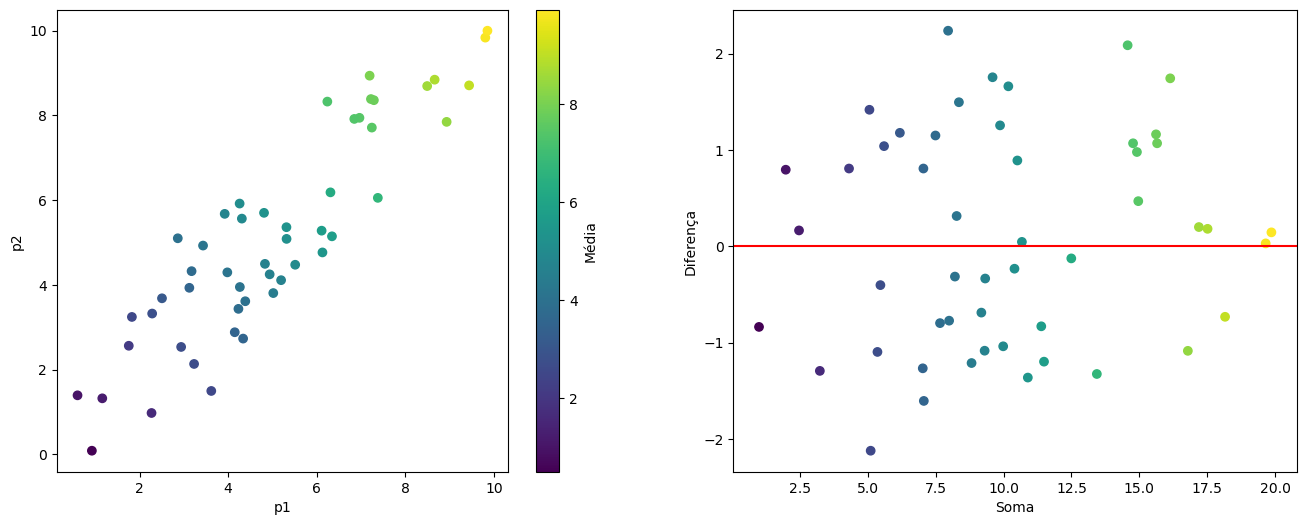

In [88]:
# Config dos eixos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico p1 X p2
scatter1 = ax[0].scatter(x=df.p1, y=df.p2, c=df['média'])
ax[0].set_xlabel('p1')  
ax[0].set_ylabel('p2')  

# Barra de cores - Determina cor do valores com base na - média
cbar = fig.colorbar(scatter1, ax=ax[0])
cbar.set_label('Média')  # Legenda da barra de cores

# Gráfico Soma 
scatter2 = ax[1].scatter(x=df['soma'], y=df['diferença'], c=df['média'])
ax[1].axhline(y=0, linewidth=1.5, linestyle='solid', color='red')  # Linha 0
ax[1].set_xlabel('Soma')  
ax[1].set_ylabel('Diferença')  

plt.show()

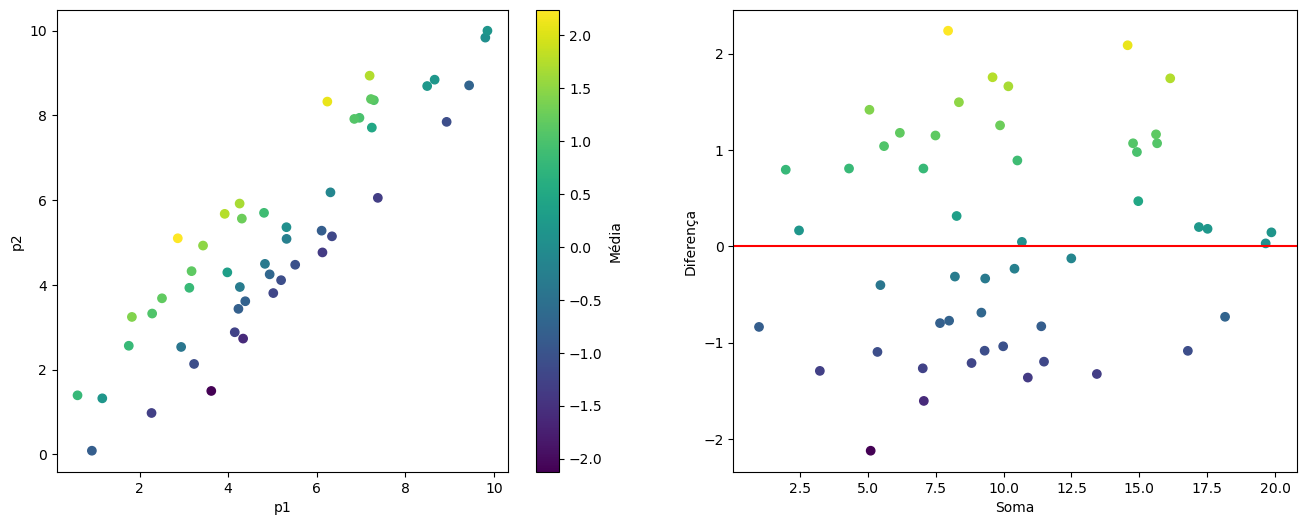

In [89]:
# Config dos eixos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico p1 X p2
scatter1 = ax[0].scatter(x=df.p1, y=df.p2, c=df['diferença'])
ax[0].set_xlabel('p1')  
ax[0].set_ylabel('p2')  

# Barra de cores - Determina cor do valores com base na - diferença
cbar = fig.colorbar(scatter1, ax=ax[0])
cbar.set_label('Média')  # Legenda da barra de cores

# Gráfico Soma 
scatter2 = ax[1].scatter(x=df['soma'], y=df['diferença'], c=df['diferença'])
ax[1].axhline(y=0, linewidth=1.5, linestyle='solid', color='red')  # Linha 0
ax[1].set_xlabel('Soma')  
ax[1].set_ylabel('Diferença')  

plt.show()

In [90]:
df.corr()

,p1,p2,média,diferença,soma
p1,1.000000,0.895737,0.971960,-0.103312,0.971960
p2,0.895737,1.000000,0.975163,0.349666,0.975163
média,0.971960,0.975163,1.000000,0.133474,1.000000
diferença,-0.103312,0.349666,0.133474,1.000000,0.133474
soma,0.971960,0.975163,1.000000,0.133474,1.000000


> Podemos concluir com a observação dos gráficos que a distribuição proporcional prevalece em todos os nossos gráficos utilizando a variação por Média ou pela Diferença em ambos os gráficos. Assim como consequência de sua proporcionalidade podemos verificar que a soma na tabela de correlações está altamente ligada as variáveis p1, p2, média.
> 
> A alta correlação entre soma e média acontecem pois a soma de p1 e p2 é o dobro do valor médio sendo uma correlação forte.